**Demand Prediction for Walmart Companion AI**
we built a simple demand forecasting model using historical Walmart sales data.
Our goal is to predict future weekly sales for a specific store and department to help reduce unexpected stockouts, avoid overstocking, and enable data-driven inventory planning.

We use Walmart’s Store Sales Forecasting dataset, which contains:

1. **Store:** ID of the store.
   
   Selects the physical store for which we predict demand.
2. **Dept:** ID of the department (acts like a product category).
   
   Selects the product category to forecast (acts as “product”).
3. **Date:** The week of the sales data.
   
   Provides the time series trend and seasonality.
4. **Weekly_Sales:** Actual sales in USD — this is our target to predict.
   
   Target variable ; actual demand to learn patterns.
5. **IsHoliday:** Whether the week includes a major holiday (affects demand spikes).
    
    Optional feature — adjusts forecast for demand spikes.

Train → Predict → Save JSON

In [184]:
import os 
path = os.getcwd()
print("we are in" , path)

we are in C:\Users\Yashasri\Desktop\Mylearning\Walmart\demand forecasting


In [185]:
import pandas as pd
import numpy as np

In [186]:
df = pd.read_csv("C:\\Users\\Yashasri\\Desktop\\Mylearning\\Walmart\\demand forecasting\\train.csv")
print("data loaded")

data loaded


In [187]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [188]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [189]:
df.shape

(421570, 5)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [191]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [192]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [193]:
df.index

RangeIndex(start=0, stop=421570, step=1)

In [194]:
df.count()

Store           421570
Dept            421570
Date            421570
Weekly_Sales    421570
IsHoliday       421570
dtype: int64

In [195]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [196]:
df['Date'] = pd.to_datetime(df['Date'])

In [197]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 421570 entries, 0 to 421569
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
421570 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB


In [198]:
# Step 1: Filter Store 1 only
df_store1 = df[df['Store'] == 1].copy()

# Step 2: Get unique Depts in Store 1
unique_depts = df_store1['Dept'].unique()
print(f"Number of departments in Store 1: {len(unique_depts)}")
print(f"Sample Depts: {unique_depts[:20]}")

Number of departments in Store 1: 77
Sample Depts: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21]


17:51:52 - cmdstanpy - INFO - Chain [1] start processing



✅ Running Prophet for Dept 1...


17:51:52 - cmdstanpy - INFO - Chain [1] done processing


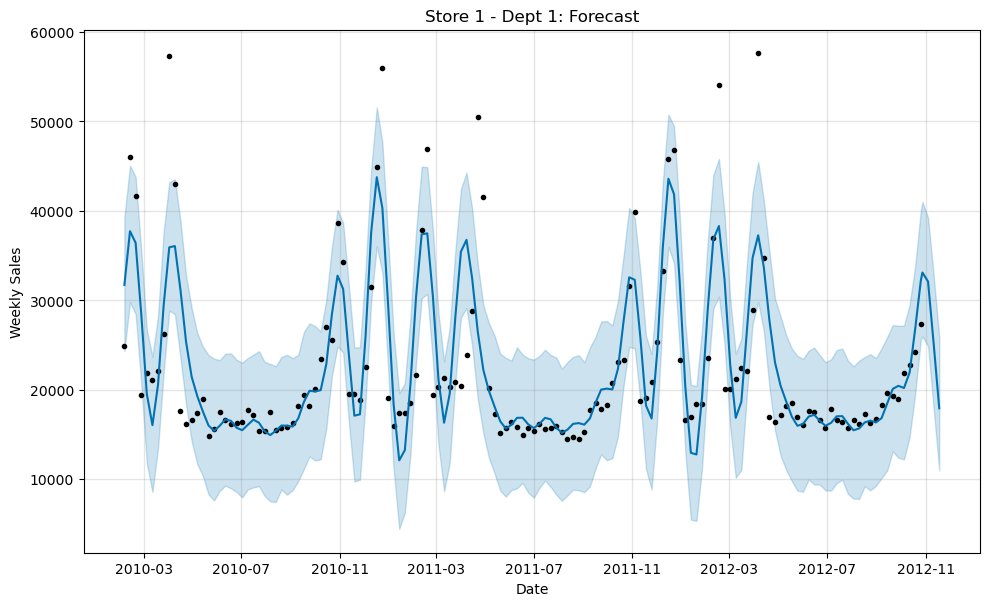

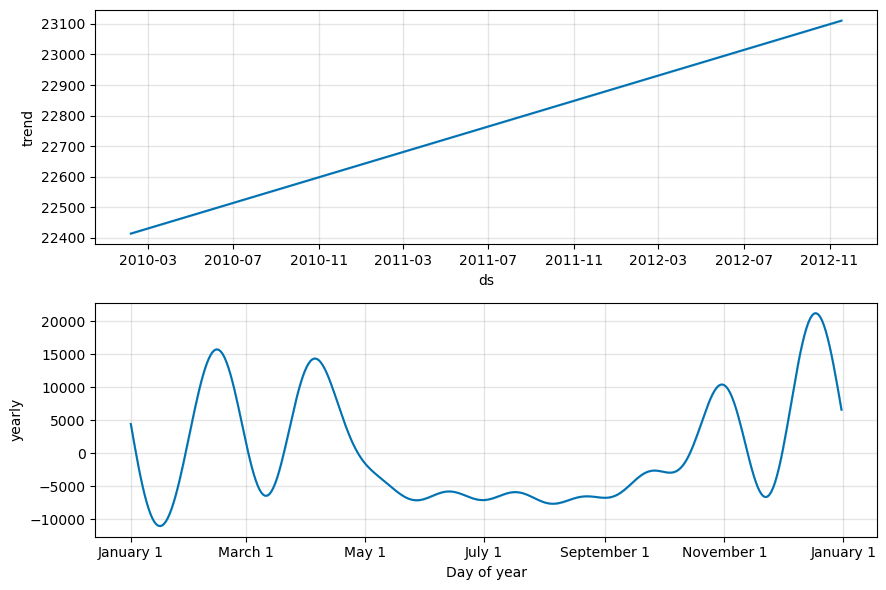

17:51:53 - cmdstanpy - INFO - Chain [1] start processing
17:51:53 - cmdstanpy - INFO - Chain [1] done processing


Dept 1 RMSE: 5845.91
✅ Done for Dept 1.

✅ Running Prophet for Dept 2...


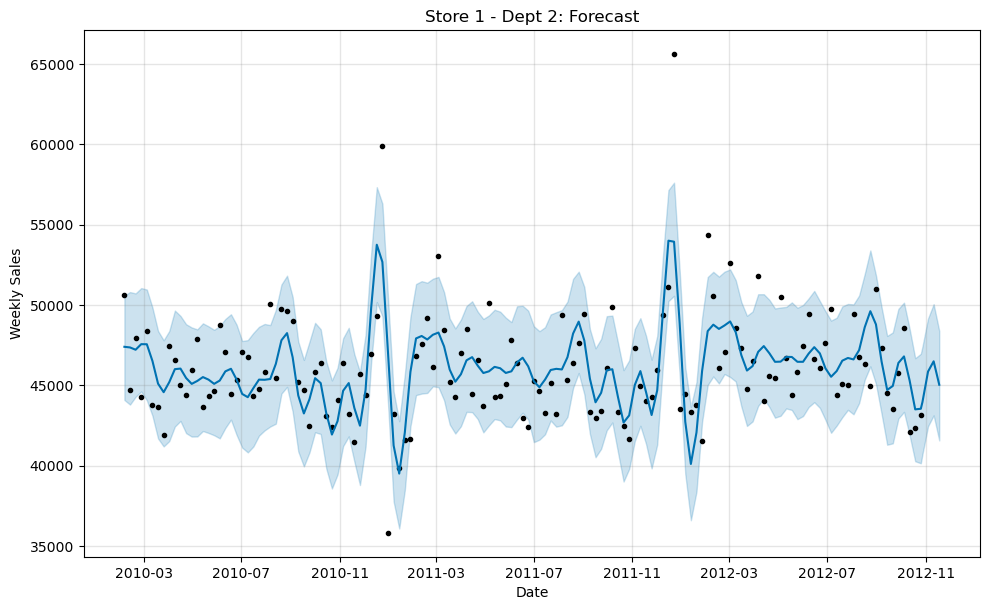

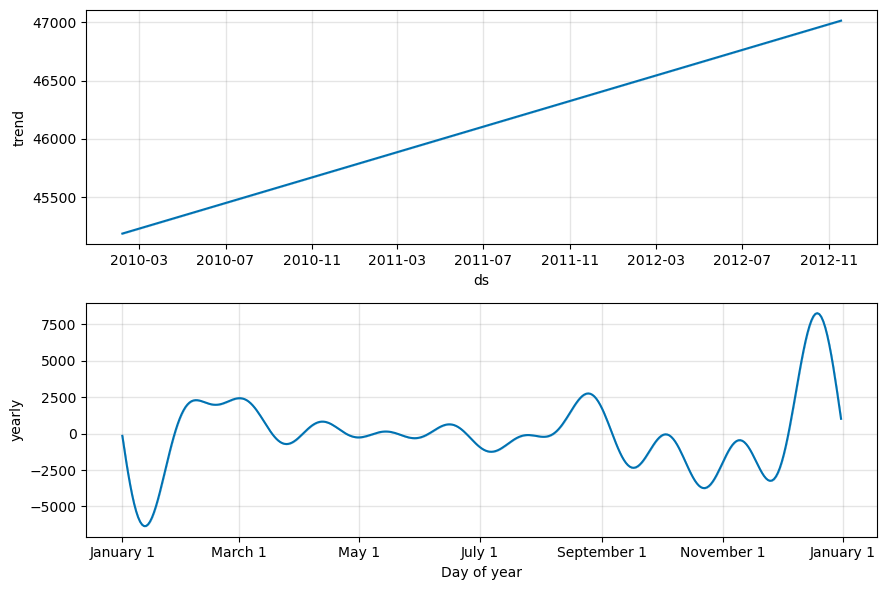

17:51:53 - cmdstanpy - INFO - Chain [1] start processing
17:51:54 - cmdstanpy - INFO - Chain [1] done processing


Dept 2 RMSE: 2623.69
✅ Done for Dept 2.

✅ Running Prophet for Dept 5...


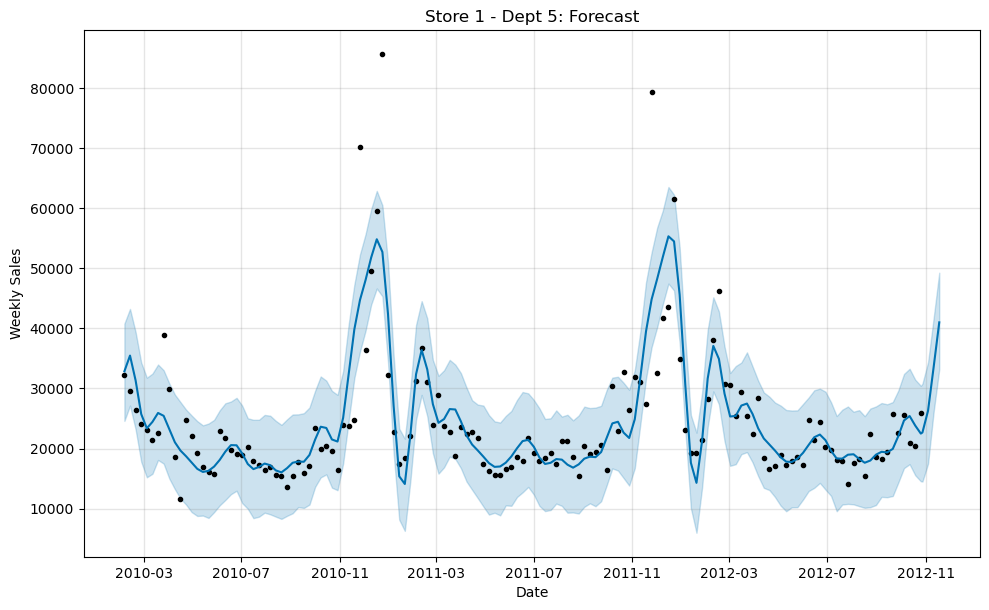

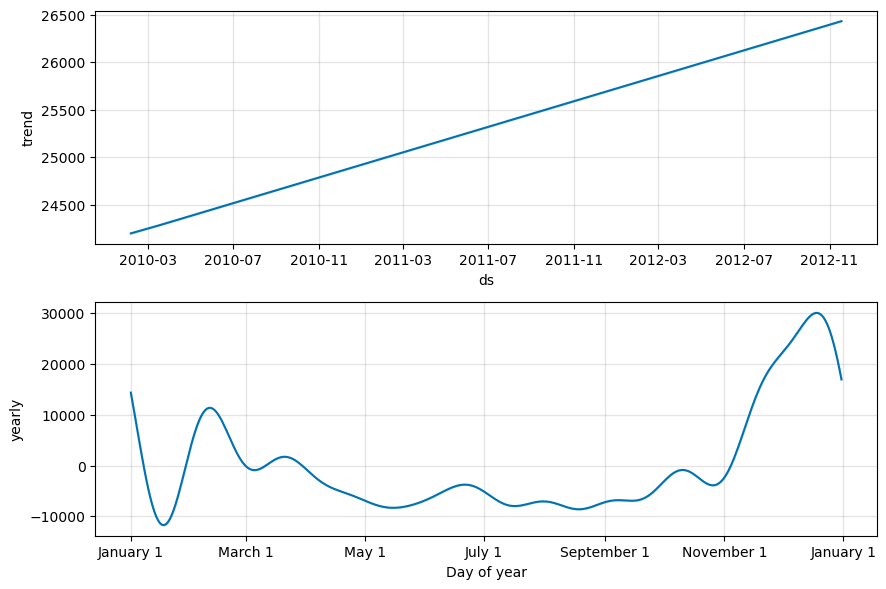

17:51:54 - cmdstanpy - INFO - Chain [1] start processing
17:51:54 - cmdstanpy - INFO - Chain [1] done processing


Dept 5 RMSE: 6386.96
✅ Done for Dept 5.

✅ Running Prophet for Dept 10...


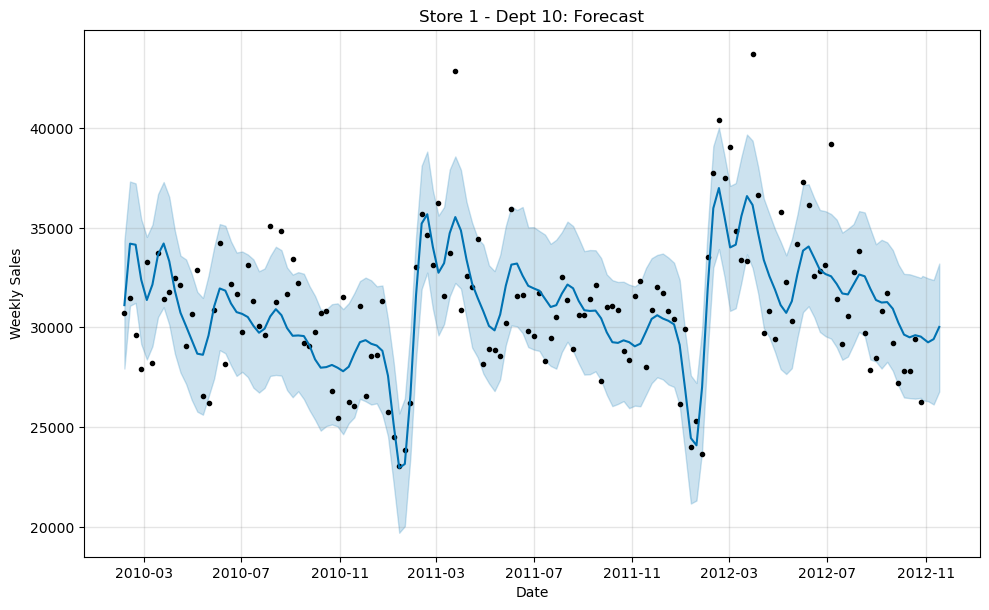

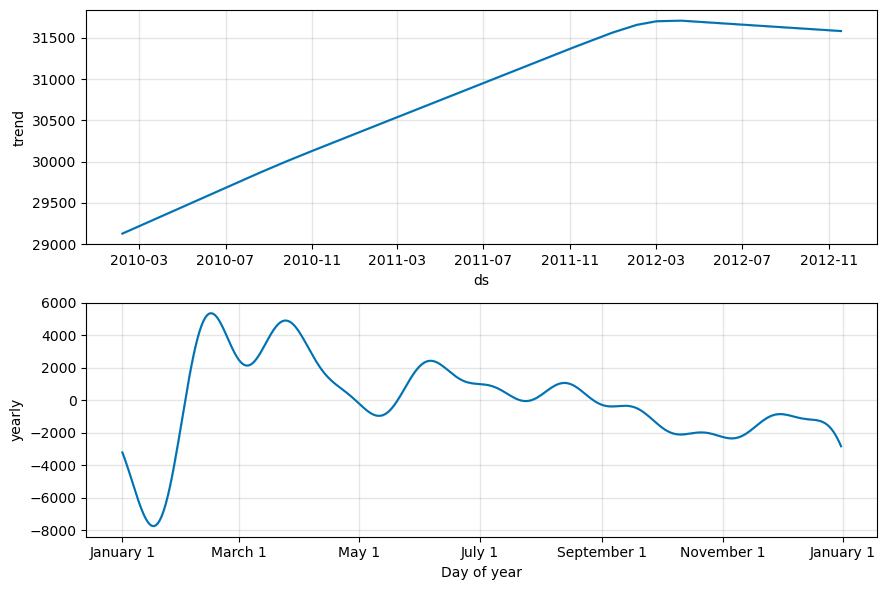

17:51:55 - cmdstanpy - INFO - Chain [1] start processing
17:51:55 - cmdstanpy - INFO - Chain [1] done processing


Dept 10 RMSE: 2404.27
✅ Done for Dept 10.

✅ Running Prophet for Dept 20...


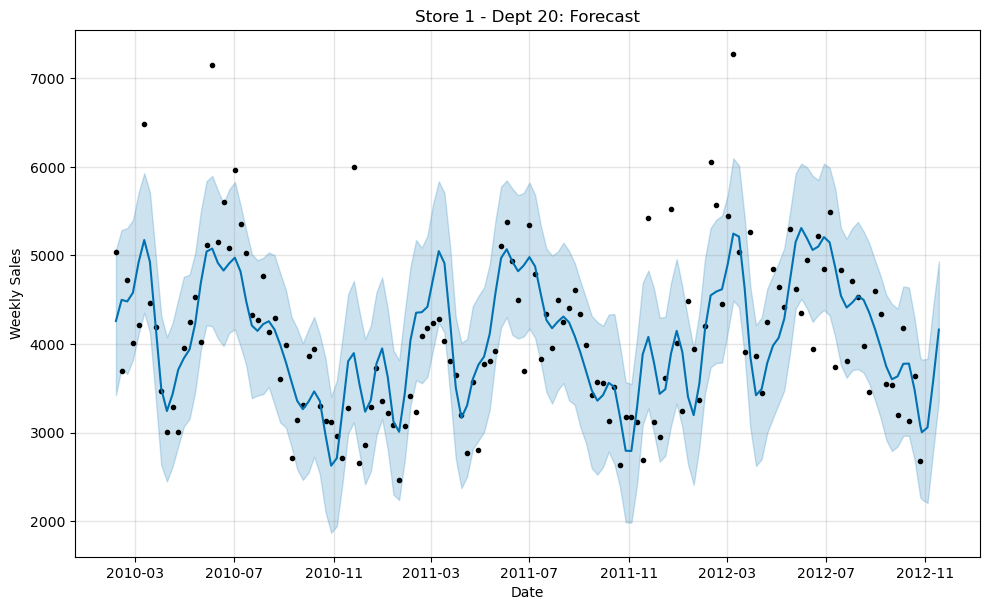

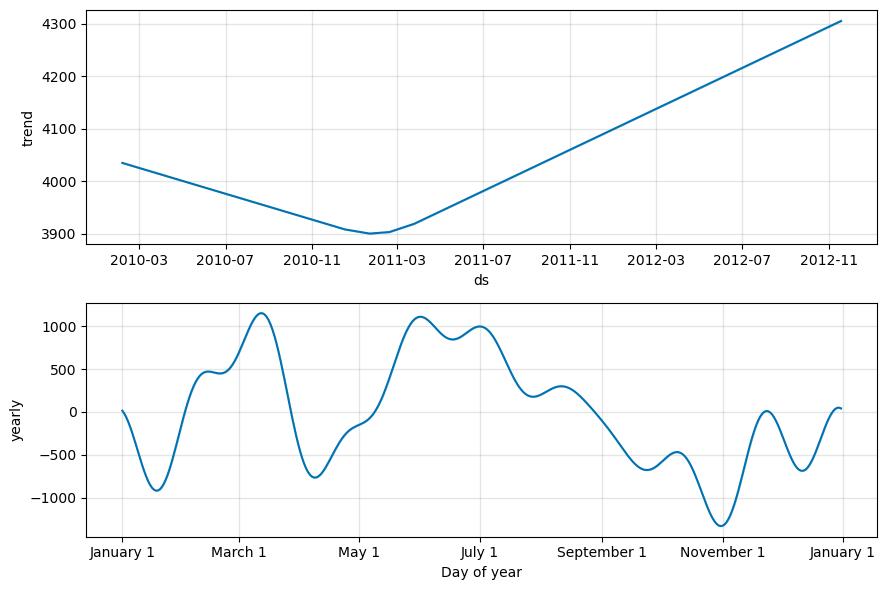

Dept 20 RMSE: 635.65
✅ Done for Dept 20.


In [219]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Make sure your date column is datetime!
df['Date'] = pd.to_datetime(df['Date'])

# Filter Store 1 only
df_store1 = df[df['Store'] == 1].copy()

# Pick the 5 sample depts you want to test
sample_depts = [1, 2, 5, 10, 20]
results = {}  # results dictionary

# Loop over each dept
for dept in sample_depts:
    print(f"\n✅ Running Prophet for Dept {dept}...")
    
    # Filter data for that dept
    df_dept = df_store1[df_store1['Dept'] == dept].copy()
    
    # Rename for Prophet
    df_dept.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'}, inplace=True)
    df_dept = df_dept[['ds', 'y']].sort_values('ds')
    
    # Init and fit Prophet
    m = Prophet()
    m.fit(df_dept)
    
    # Future dataframe: predict next 4 weeks
    future = m.make_future_dataframe(periods=4, freq='W')
    forecast = m.predict(future)

    last_4 = forecast.tail(4)[['ds', 'yhat']] 
    results[f"Dept_{dept}"] = last_4.to_dict(orient='records')
    
    # Plot full forecast
    fig = m.plot(forecast)
    plt.title(f'Store 1 - Dept {dept}: Forecast')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.show()
    
    # Plot components
    fig2 = m.plot_components(forecast)
    plt.show()
    
    # Quick RMSE: compare only on training
    y_true = df_dept['y'].values
    y_pred = forecast['yhat'][:len(y_true)].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"Dept {dept} RMSE: {rmse:.2f}")
    
    print(f"✅ Done for Dept {dept}.")

In [221]:
import json

with open('store1_forecasts.json', 'w') as f:
    json.dump(results, f, indent=4, default=str)

print("✅ Forecasts saved to store1_forecasts.json")

✅ Forecasts saved to store1_forecasts.json
